In [204]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics
import seaborn as sn
from sklearn.preprocessing import MinMaxScaler
sn.set_context("paper")

In [205]:
def roc_amrfinder(test,tool, hmd = False):
    test_data = pd.read_csv(test)
    if hmd:
        test_data["Acession"] = test_data["Acession"].fillna(test_data["Source"])
    else:
        test_data.rename(columns = {"Source":'Acession'}, inplace=True)
    test_data.rename(columns = {"Class":'ytrue'}, inplace=True)
    test_data = test_data[["Acession","ytrue"]]
    test_data["ytrue"] = [0 if i == "NonR" else 1.0 for i in test_data.ytrue]

    df = pd.read_csv(tool, sep = "\t")
    df = df[["Protein identifier", "% Identity to reference sequence"]]
    df.rename(columns={"Protein identifier":"Acession","% Identity to reference sequence":"ypred"}, inplace=True)
    df["ypred"] = df.ypred.div(100)

    test_data = test_data.merge(df, on = "Acession", how = "left")
    test_data.fillna(0.0, inplace = True)

    fpr, tpr, _ = metrics.roc_curve(test_data.ytrue.to_list(),test_data.ypred.to_list())
    roc_auc_ = metrics.auc(fpr, tpr)
    return fpr, tpr, round(roc_auc_,3)

In [206]:
def roc_card(test,tool, hmd = False):

    test_data = pd.read_csv(test)
    if hmd:
        test_data["Acession"] = test_data["Acession"].fillna(test_data["Source"])
    else:
        test_data.rename(columns = {"Source":'Acession'}, inplace=True)
    test_data.rename(columns = {"Class":'ytrue'}, inplace=True)
    test_data = test_data[["Acession","ytrue"]]
    test_data["ytrue"] = [0 if i == "NonR" else 1.0 for i in test_data.ytrue]

    df = pd.read_csv(tool, sep = "\t")
    df = df[["ORF_ID","Best_Hit_Bitscore","Pass_Bitscore"]]
    df.rename(columns={"ORF_ID":"Acession"}, inplace = True)

    df["Bit-ratio"] = round(df.Pass_Bitscore  / df.Best_Hit_Bitscore, 2)
    Scaler =  MinMaxScaler()
    Scaler.fit(df["Bit-ratio"].to_numpy().reshape(-1,1))
    df["ypred"] =  Scaler.transform(df["Bit-ratio"].to_numpy().reshape(-1,1)).squeeze()


    test_data = test_data.merge(df, on = "Acession", how = "left")
    test_data.fillna(0.0, inplace = True)


    fpr, tpr, _ = metrics.roc_curve(test_data.ytrue.to_list(),test_data.ypred.to_list())
    roc_auc_ = metrics.auc(fpr, tpr)
    return fpr, tpr, round(roc_auc_,3)



In [207]:
def roc_deeparg(test,tool,id,ypred,             sep = "\t",hmd = False):
    test_data = pd.read_csv(test)
    if hmd:
        test_data["Acession"] = test_data["Acession"].fillna(test_data["Source"])

    else:
        test_data.rename(columns = {"Source":'Acession'}, inplace=True)

    test_data.rename(columns = {"Class":'ytrue'}, inplace=True)
    test_data = test_data[["Acession","ytrue"]]


    test_data["ytrue"] = [1.0 if i != "NonR" else 0.0 for i in test_data.ytrue]

    df = pd.read_csv(tool, sep = sep)
    df = df[[id,ypred]]
    df.rename(columns = {id:"Acession",ypred:"ypred"}, inplace = True)

    test_data = test_data.merge(df, on = "Acession", how = "left")
    test_data.fillna(0.0, inplace = True)

    fpr, tpr, _ = metrics.roc_curve(test_data.ytrue.to_list(),test_data.ypred.to_list())
    roc_auc_ = metrics.auc(fpr, tpr)
    return fpr, tpr, round(roc_auc_,3)


In [208]:
def roc_deepSEA(test,tool,id,amr,ypred,sep = "\t",hmd = False):
    test_data = pd.read_csv(test)
    if hmd:
        test_data["Acession"] = test_data["Acession"].fillna(test_data["Source"])
    else:
        test_data.rename(columns = {"Source":'Acession'}, inplace=True)
    test_data.rename(columns = {"Class":'ytrue'}, inplace=True)
    test_data = test_data[["Acession","ytrue"]]
    test_data["ytrue"] = [0 if i == "NonR" else 1.0 for i in test_data.ytrue]

    

    df = pd.read_csv(tool, sep = sep)
    df = df[[id,amr,ypred]]
    df.rename(columns = {id:"Acession",ypred:"ypred",amr:"amr"}, inplace = True)
    df["ypred"] = [1-i.ypred if i.amr == "NonR" else i.ypred for i in df.itertuples()]
    
    test_data = test_data.merge(df, on = "Acession", how = "left")

    fpr, tpr, _ = metrics.roc_curve(test_data.ytrue.to_list(),test_data.ypred.to_list())
    roc_auc_ = metrics.auc(fpr, tpr)
    return fpr, tpr, round(roc_auc_,3)

In [209]:
deepSEA_cnn_aligned =      roc_deepSEA(test = '../data/HMD/TestHMD-ma-align.csv', tool = "../data/benckmarking/DeepSEA-output/HMD-align-cnn.csv",            id = "identifier",amr = "Aligned-class", ypred = "Aligned-prob", hmd = True, sep = ",");
deepSEA_cnn_same_aligned = roc_deepSEA(test = '../data/HMD/TestHMD-ma-align.csv', tool = "../data/benckmarking/DeepSEA-output/HMD-align-cnn-same.csv",       id = "identifier",amr = "Aligned-class", ypred = "Aligned-prob", hmd = True, sep = ",");
deepSEA_gru_aligned =      roc_deepSEA(test = '../data/HMD/TestHMD-ma-align.csv', tool = "../data/benckmarking/DeepSEA-output/HMD-align-gru.csv",            id = "identifier",amr = "Aligned-class", ypred = "Aligned-prob", hmd = True, sep = ",");
deepARG_aligned =          roc_deeparg(test = '../data/HMD/TestHMD-ma-align.csv', tool = "../data/benckmarking/DeepARG-output/TestHMD-ma-align.mapping.ARG", id = "read_id",ypred = "probability", hmd = True);
rgi_aligned =              roc_card(test = '../data/HMD/TestHMD-ma-align.csv', tool = "../data/benckmarking/RGI-output/TestHMD-ma-align.rgi.txt", hmd = True);
amrf_aligned =             roc_amrfinder(test = '../data/HMD/TestHMD-ma-align.csv', tool = "../data/benckmarking/Amrfinder-output/TestHMD-ma-align.amrfinder.tsv", hmd = True);



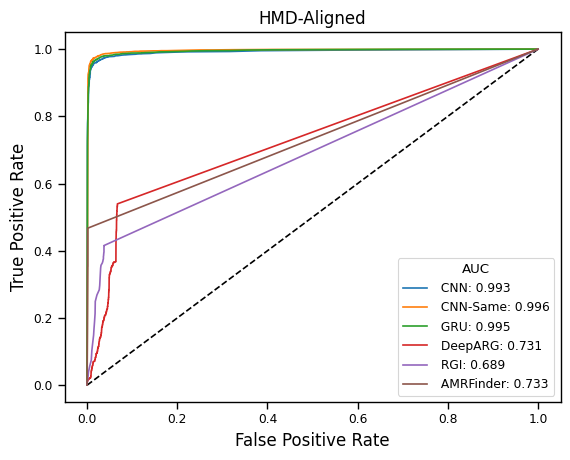

In [210]:
plt.plot([0,1],[0,1], c = "k", linestyle = "dashed")


plt.plot(deepSEA_cnn_aligned[0],      deepSEA_cnn_aligned[1],     label = f" CNN: {deepSEA_cnn_aligned[2]}")
plt.plot(deepSEA_cnn_same_aligned[0], deepSEA_cnn_same_aligned[1],label = f" CNN-Same: {deepSEA_cnn_same_aligned[2]}")
plt.plot(deepSEA_gru_aligned[0],      deepSEA_gru_aligned[1],     label = f" GRU: {deepSEA_gru_aligned[2]}")
plt.plot(deepARG_aligned[0],          deepARG_aligned[1],         label = f" DeepARG: {deepARG_aligned[2]}")
plt.plot(rgi_aligned[0],              rgi_aligned[1],             label = f" RGI: {rgi_aligned[2]}")
plt.plot(amrf_aligned[0],              amrf_aligned[1],           label = f" AMRFinder: {amrf_aligned[2]}")





plt.title("HMD-Aligned", fontsize = 12)
plt.xlabel("False Positive Rate", fontsize = 12)
plt.ylabel("True Positive Rate", fontsize = 12)
plt.legend(title = "AUC")
plt.savefig("../../figs/ROC-AUC-HMD-Aligned.svg", format = "SVG")

In [211]:
deepSEA_cnn_unaligned =      roc_deepSEA(test = '../data/HMD/TestHMD-ma-unalign.csv', tool = "../data/benckmarking/DeepSEA-output/HMD-unalign-cnn.csv",            id = "identifier",amr = "Unaligned-class", ypred = "Unaligned-prob", hmd = True, sep = ",");
deepSEA_cnn_same_unaligned = roc_deepSEA(test = '../data/HMD/TestHMD-ma-unalign.csv', tool = "../data/benckmarking/DeepSEA-output/HMD-unalign-cnn-same.csv",       id = "identifier",amr = "Unaligned-class", ypred = "Unaligned-prob", hmd = True, sep = ",");
deepSEA_gru_unaligned =      roc_deepSEA(test = '../data/HMD/TestHMD-ma-unalign.csv', tool = "../data/benckmarking/DeepSEA-output/HMD-unalign-gru.csv",            id = "identifier",amr = "Unaligned-class", ypred = "Unaligned-prob", hmd = True, sep = ",");
deepARG_unaligned =          roc_deeparg(test = '../data/HMD/TestHMD-ma-unalign.csv', tool = "../data/benckmarking/DeepARG-output/TestHMD-ma-unalign.mapping.ARG", id = "read_id",ypred = "probability", hmd = True);
rgi_unaligned =              roc_card(test = '../data/HMD/TestHMD-ma-unalign.csv',    tool = "../data/benckmarking/RGI-output/TestHMD-ma-unalign.rgi.txt", hmd = True);
amrf_unaligned =             roc_amrfinder(test = '../data/HMD/TestHMD-ma-unalign.csv', tool = "../data/benckmarking/Amrfinder-output/TestHMD-ma-unalign.amrfinder.tsv", hmd = True);





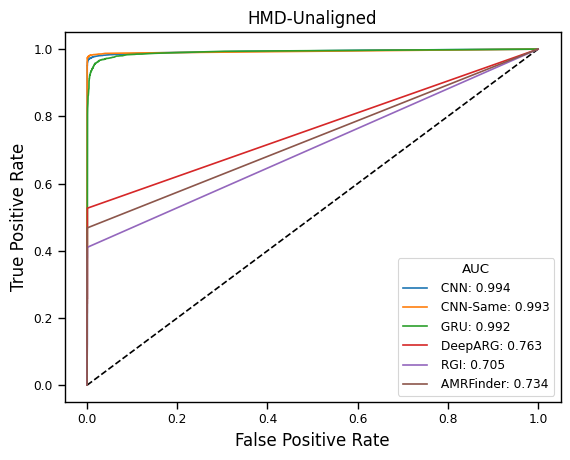

In [212]:
plt.plot([0,1],[0,1], c = "k", linestyle = "dashed")


plt.plot(deepSEA_cnn_unaligned[0],      deepSEA_cnn_unaligned[1],     label = f" CNN: {deepSEA_cnn_unaligned[2]}")
plt.plot(deepSEA_cnn_same_unaligned[0], deepSEA_cnn_same_unaligned[1],label = f" CNN-Same: {deepSEA_cnn_same_unaligned[2]}")
plt.plot(deepSEA_gru_unaligned[0],      deepSEA_gru_unaligned[1],     label = f" GRU: {deepSEA_gru_unaligned[2]}")
plt.plot(deepARG_unaligned[0],        deepARG_unaligned[1],       label = f" DeepARG: {deepARG_unaligned[2]}")
plt.plot(rgi_unaligned[0],              rgi_unaligned[1],             label = f" RGI: {rgi_unaligned[2]}")
plt.plot(amrf_unaligned[0],              amrf_unaligned[1],             label = f" AMRFinder: {amrf_unaligned[2]}")




plt.title("HMD-Unaligned", fontsize = 12)
plt.xlabel("False Positive Rate", fontsize = 12)
plt.ylabel("True Positive Rate", fontsize = 12)
plt.legend(title = "AUC")
plt.savefig("../../figs/ROC-AUC-HMD-Unaligned.svg", format = "SVG")

In [213]:
deepSEA_cnn_aligned =      roc_deepSEA(test = '../data/NCRD/TestNcrd95-ma-align.csv', tool = "../data/benckmarking/DeepSEA-output/NCRD-align-cnn.csv",              id = "identifier",amr = "Aligned-class", ypred = "Aligned-prob", sep = ",");
deepSEA_cnn_same_aligned = roc_deepSEA(test = '../data/NCRD/TestNcrd95-ma-align.csv', tool = "../data/benckmarking/DeepSEA-output/NCRD-align-cnn-same.csv",         id = "identifier",amr = "Aligned-class", ypred = "Aligned-prob", sep = ",");
deepSEA_gru_aligned =      roc_deepSEA(test = '../data/NCRD/TestNcrd95-ma-align.csv', tool = "../data/benckmarking/DeepSEA-output/NCRD-align-gru.csv",              id = "identifier",amr = "Aligned-class", ypred = "Aligned-prob", sep = ",");
deepARG_aligned =          roc_deeparg(test = '../data/NCRD/TestNcrd95-ma-align.csv', tool = "../data/benckmarking/DeepARG-output/TestNcrd95-ma-align.mapping.ARG", id = "read_id",ypred = "probability");
rgi_aligned =              roc_card(test =  '../data/NCRD/TestNcrd95-ma-align.csv', tool = "../data/benckmarking/RGI-output/TestNcrd95-ma-align.rgi.txt", hmd = False);
amrf_aligned =            roc_amrfinder(test = '../data/NCRD/TestNcrd95-ma-unalign.csv', tool = "../data/benckmarking/Amrfinder-output/TestNcrd95-ma-align.amrfinder.tsv", hmd = False);


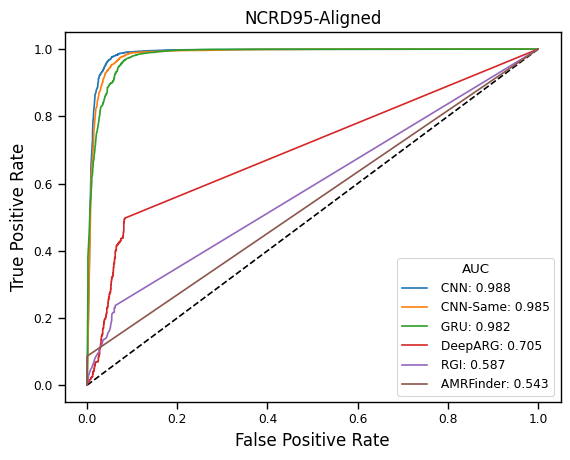

In [214]:
plt.plot([0,1],[0,1], c = "k", linestyle = "dashed")

plt.plot(deepSEA_cnn_aligned[0],      deepSEA_cnn_aligned[1],     label = f" CNN: {deepSEA_cnn_aligned[2]}")
plt.plot(deepSEA_cnn_same_aligned[0], deepSEA_cnn_same_aligned[1],label = f" CNN-Same: {deepSEA_cnn_same_aligned[2]}")
plt.plot(deepSEA_gru_aligned[0],      deepSEA_gru_aligned[1],     label = f" GRU: {deepSEA_gru_aligned[2]}")
plt.plot(deepARG_aligned[0],          deepARG_aligned[1],         label = f" DeepARG: {deepARG_aligned[2]}")
plt.plot(rgi_aligned[0],              rgi_aligned[1],             label = f" RGI: {rgi_aligned[2]}")
plt.plot(amrf_aligned[0],              amrf_aligned[1],           label = f" AMRFinder: {amrf_aligned[2]}")




plt.title("NCRD95-Aligned", fontsize = 12)
plt.xlabel("False Positive Rate", fontsize = 12)
plt.ylabel("True Positive Rate", fontsize = 12)
plt.legend(title = "AUC")
plt.savefig("../../figs/ROC-AUC-NCRD-Aligned.svg", format = "SVG")

In [215]:
deepSEA_cnn_unaligned =      roc_deepSEA(test = '../data/NCRD/TestNcrd95-ma-unalign.csv', tool = "../data/benckmarking/DeepSEA-output/NCRD-unalign-cnn.csv",              id = "identifier",amr = "Unaligned-class", ypred = "Unaligned-prob", sep = ",");
deepSEA_cnn_same_unaligned = roc_deepSEA(test = '../data/NCRD/TestNcrd95-ma-unalign.csv', tool = "../data/benckmarking/DeepSEA-output/NCRD-unalign-cnn-same.csv",         id = "identifier",amr = "Unaligned-class", ypred = "Unaligned-prob", sep = ",");
deepSEA_gru_unaligned =      roc_deepSEA(test = '../data/NCRD/TestNcrd95-ma-unalign.csv', tool = "../data/benckmarking/DeepSEA-output/NCRD-unalign-gru.csv",              id = "identifier",amr = "Unaligned-class", ypred = "Unaligned-prob", sep = ",");
deepARG_unaligned =          roc_deeparg(test = '../data/NCRD/TestNcrd95-ma-unalign.csv', tool = "../data/benckmarking/DeepARG-output/TestNcrd95-ma-unalign.mapping.ARG", id = "read_id",ypred = "probability");
rgi_unaligned =                roc_card(test =    '../data/NCRD/TestNcrd95-ma-unalign.csv', tool = "../data/benckmarking/RGI-output/TestNcrd95-ma-unalign.rgi.txt", hmd = False);
amrf_unaligned =              roc_amrfinder(test ='../data/NCRD/TestNcrd95-ma-unalign.csv', tool = "../data/benckmarking/Amrfinder-output/TestNcrd95-ma-unalign.amrfinder.tsv", hmd = False);



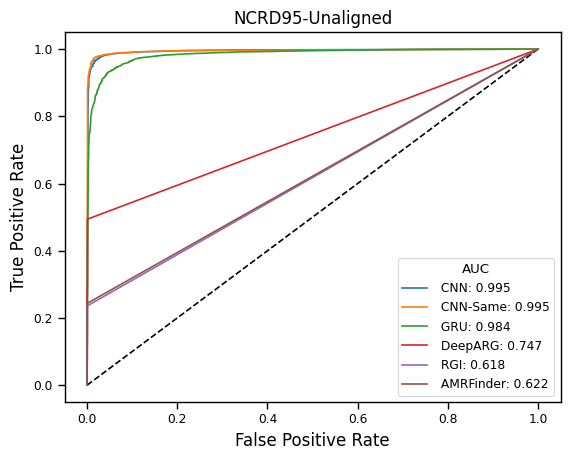

In [216]:
plt.plot([0,1],[0,1], c = "k", linestyle = "dashed")

plt.plot(deepSEA_cnn_unaligned[0],      deepSEA_cnn_unaligned[1],     label = f" CNN: {deepSEA_cnn_unaligned[2]}")
plt.plot(deepSEA_cnn_same_unaligned[0], deepSEA_cnn_same_unaligned[1],label = f" CNN-Same: {deepSEA_cnn_same_unaligned[2]}")
plt.plot(deepSEA_gru_unaligned[0],      deepSEA_gru_unaligned[1],     label = f" GRU: {deepSEA_gru_unaligned[2]}")
plt.plot(deepARG_unaligned[0],          deepARG_unaligned[1],         label = f" DeepARG: {deepARG_unaligned[2]}")
plt.plot(rgi_unaligned[0],                rgi_unaligned[1],           label = f" RGI: {rgi_unaligned[2]}")
plt.plot(amrf_unaligned[0],                amrf_unaligned[1],         label = f" AMRFinder: {amrf_unaligned[2]}")


plt.title("NCRD95-Unaligned", fontsize = 12)
plt.xlabel("False Positive Rate", fontsize = 12)
plt.ylabel("True Positive Rate", fontsize = 12)
plt.legend(title = "AUC")
plt.savefig("../../figs/ROC-AUC-NCRD-Unaligned.svg", format = "SVG")